## Learning session

In [74]:
# L_level_change
import pandas as pd
import numpy as np

# Define a function to keep the original format as a string
def keep_original_format(x):
    return str(x)
# Load the Excel file and use the converter for the "Duration (min:sec)" column
file_path = 'student8/s8.xlsx'
df = pd.read_excel(file_path, converters={'outcome': keep_original_format})

In [75]:
df['end_time'] = df['end_time'].ffill()
df['start_time'] = df['start_time'].ffill()
df['session'] = df['session'].ffill()

In [76]:
import pandas as pd
import re

def convert_to_seconds(duration):
    # Split the duration into parts
    parts = duration.split(':')
    
    if len(parts) == 3:
        # Handle HH:MM:SS format
        hours = int(parts[0])
        minutes = int(parts[1])
        seconds = int(parts[2])
        return hours * 3600 + minutes * 60 + seconds
    
    elif len(parts) == 2:
        # Handle MM:SS format
        minutes = int(parts[0])
        seconds = int(parts[1])
        return minutes * 60 + seconds
    
    return 0  # Return 0 for unexpected formats

# Ensure 'Duration (min:sec)' is treated as a string and then apply the function
df['Duration (min:sec)'] = df['Duration (min:sec)'].astype(str)
df['Duration (seconds)'] = df['Duration (min:sec)'].apply(lambda x: convert_to_seconds(x) if pd.notna(x) else 0)

In [77]:
# Count the frequency of each unique value in the 'skill_chapter' column
skill_chapter_counts = df['skill_chapter'].value_counts()

# Print the total count (number of rows in the DataFrame)
print("Total count of rows:", len(df))

# Print the top 10 most frequent values in the 'skill_chapter' column
print("Top 10 skill_chapter values and their counts:")
print(skill_chapter_counts.head(10))

# Extract the top 10 skill_chapter names
top_10_skill_chapters = skill_chapter_counts.head(10).index.tolist()

# For these top 10 chapters, get their first and last start_time.
# Assuming start_time is of a datetime type or a sortable string, and the data represents the order correctly.
aggregated_times = df[df['skill_chapter'].isin(top_10_skill_chapters)] \
    .groupby('skill_chapter')['start_time'] \
    .agg(first='first', last='last')

print("\nFirst and Last start_time for top 10 skill values:")
print(aggregated_times)


Total count of rows: 27842
Top 10 skill_chapter values and their counts:
skill_chapter
G8 3     886
G8 10    807
G8 9     657
G8 8     608
G9 5     582
G8 7     579
G7 4     526
G8 6     522
G7 7     517
G8 4     507
Name: count, dtype: int64

First and Last start_time for top 10 skill values:
                            first                last
skill_chapter                                        
G7 4          2020-11-14 09:08:16 2024-08-11 10:15:54
G7 7          2020-12-08 08:10:12 2024-09-02 10:20:40
G8 10         2021-02-09 18:46:01 2025-03-09 10:57:37
G8 3          2021-02-04 19:30:36 2024-11-18 21:56:07
G8 4          2021-02-07 14:37:09 2025-01-02 14:27:40
G8 6          2021-02-07 15:19:53 2025-03-01 14:06:52
G8 7          2021-02-07 15:31:52 2024-07-30 09:15:33
G8 8          2021-03-14 12:44:17 2024-07-22 10:04:33
G8 9          2021-02-08 18:05:53 2025-01-20 16:05:04
G9 5          2022-10-05 11:01:46 2025-01-02 14:21:56


In [88]:
# 1. Create the group column
non_nan_mask = df['session'].notna()
df['group'] = non_nan_mask.cumsum()

# 2. Fill 'Start Time', 'End Time', and 'Session' for each group
df[['start_time', 'end_time', 'session']] = (
    df
    .groupby('group')[['start_time', 'end_time', 'session']]
    .transform(lambda col: col.ffill())
)

skill ='G5 4'

# 3. Filter and display rows where 'skill_head' == 'G3 1.5'
filtered_df = df.loc[df['skill_chapter'] == skill]

In [89]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Work on a copy of the DataFrame
filtered_df = filtered_df.copy()

# Convert time columns to string and to datetime for gap calculations and duration computation
filtered_df['start_time'] = filtered_df['start_time'].astype(str)
filtered_df['end_time']   = filtered_df['end_time'].astype(str)
filtered_df['start_time_dt'] = pd.to_datetime(filtered_df['start_time'])
filtered_df['end_time_dt'] = pd.to_datetime(filtered_df['end_time'])


Number of x positions:  89
Number of data points:  89


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


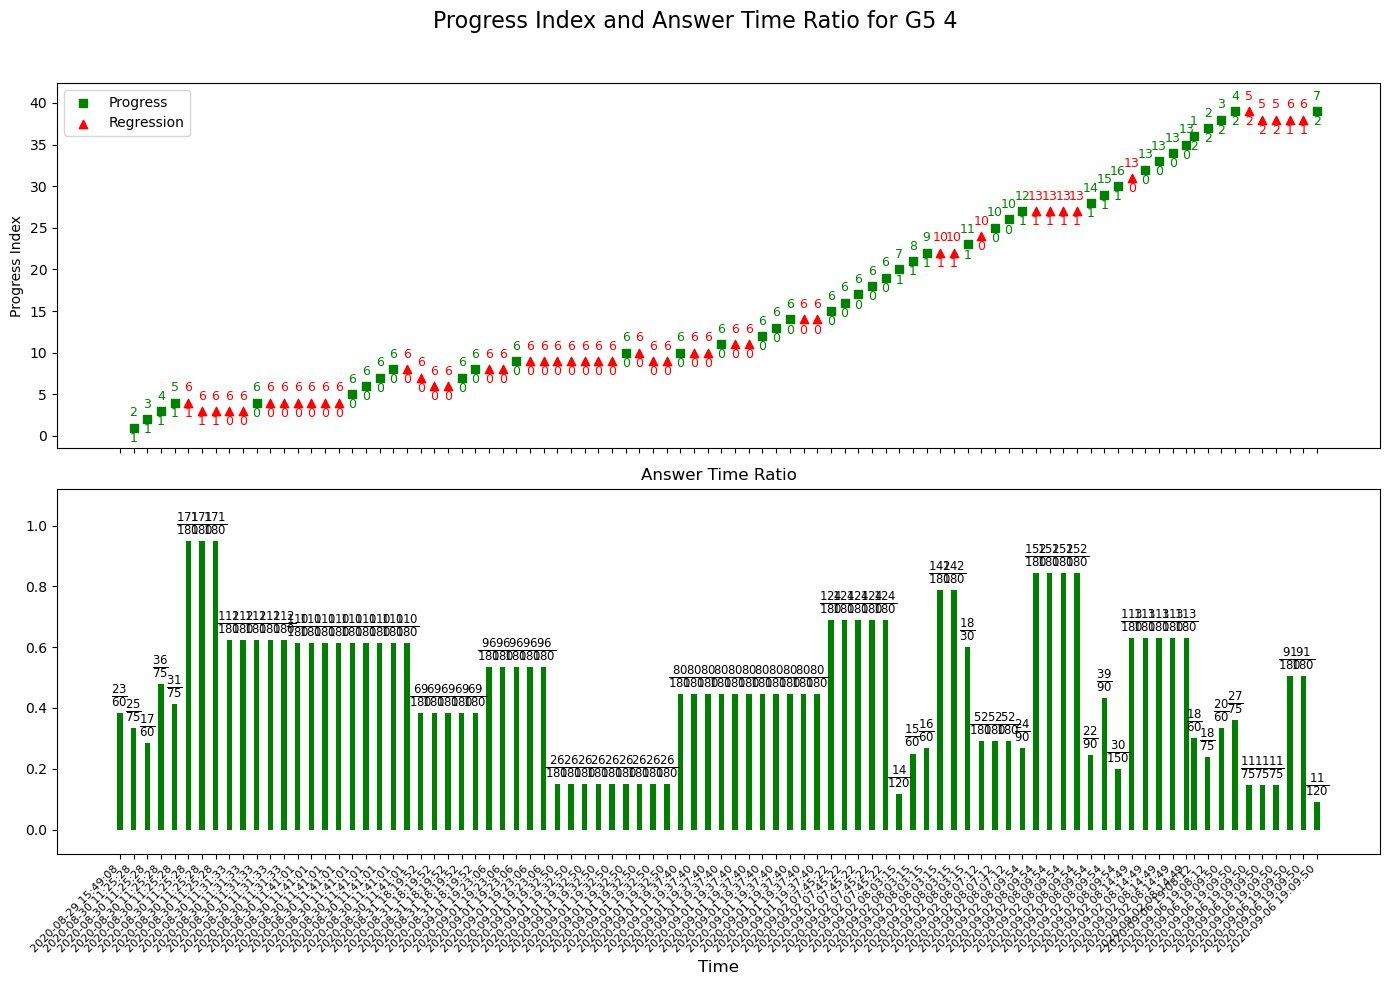

In [90]:

import pandas as pd
import matplotlib.pyplot as plt

# Define the specific period.
# start_period = '2020-08-12 14:34:25'
# end_period   = '2020-08-13 19:27:15'



start_period = '2020-08-11 14:28:42'
end_period   = '2020-09-06 19:09:50'

# Filter the DataFrame for the desired time period.
mask = (filtered_df['start_time_dt'] >= pd.to_datetime(start_period)) & \
       (filtered_df['start_time_dt'] <= pd.to_datetime(end_period))
df_period = filtered_df.loc[mask].copy()

df_period['level_begin'] = df_period['level_begin'].astype(int)

# Compute x_positions using only df_period.
new_x_positions = []
current_x = 0
new_x_positions.append(current_x)

# This list will store the color for each corresponding data point.
colors = ['blue']  # First point is default blue

# Iterate through the filtered rows.
for i in range(1, len(df_period)):
    prev_time = df_period['start_time_dt'].iloc[i-1]
    curr_time = df_period['start_time_dt'].iloc[i]
    
    # Compute the gap for x-axis positions.
    if curr_time == prev_time:
        blanks = 1
    else:
        diff_days = (curr_time.date() - prev_time.date()).days
        if diff_days <= 1:
            blanks = 1
        else:
            blanks = diff_days/30  # adjust factor as needed for larger gaps.
    
    current_x += 1 + blanks
    new_x_positions.append(current_x)
    
    # Check if the PI_skill is smaller than or equal to the previous value.
    prev_streak = df_period['PI_chapter'].iloc[i-1]
    curr_streak = df_period['PI_chapter'].iloc[i]
    
        # Check for additional condition: if session is "LEARNING" and level_begin is 0.
    # Get the current skill for the row.
    current_skill = df_period['skill_chapter'].iloc[i]

    # First, check if the immediate previous row has the same session ('LEARNING') and the same skill.
    if (curr_streak <= prev_streak and df_period['session'].iloc[i] == 'LEARNING' and 
        i > 0 and
        df_period['session'].iloc[i-1] == 'LEARNING' and 
        df_period['skill_chapter'].iloc[i-1] == current_skill):
        # If the previous row already has 'LEARNING' for the same skill, mark as red.
        colors.append('red')
    elif (curr_streak <= prev_streak or 
        (df_period['session'].iloc[i] == 'LEARNING' and df_period['session'].iloc[i-1] != 'LEARNING' and df_period['level_begin'].iloc[i] == 0)):
        # Otherwise, if the streak did not increase or if in a LEARNING session with level_begin equal to 0, mark as red.
        colors.append('red')
    else:
        # In all other cases, mark as blue.
        colors.append('blue')




# Optional: Debug prints.
print("Number of x positions: ", len(new_x_positions))
print("Number of data points: ", len(df_period))

# Create x-axis labels by converting the start_time column to strings.
time_labels = df_period['start_time'].astype(str).tolist()

# Separate indices (positions) for blue and red points and store skill_seq for both.
blue_x, blue_y, blue_skill_seq, blue_level = [], [], [], []
red_x, red_y, red_skill_seq, red_level = [], [], [], []

for i, color in enumerate(colors):
    x = new_x_positions[i]
    y = df_period['PI_chapter'].iloc[i]
    skill_seq_val = df_period['skill_seq'].iloc[i]
    level_val = df_period['level_begin'].iloc[i]
    
    if color == 'red':
        red_x.append(x)
        red_y.append(y)
        red_skill_seq.append(skill_seq_val)
        red_level.append(level_val)
    else:
        blue_x.append(x)
        blue_y.append(y)
        blue_skill_seq.append(skill_seq_val)
        blue_level.append(level_val)

# Create a figure with 2 subplots (top: scatter plot for streak index, bottom: bar/scatter plot)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)
fig.suptitle(f'Progress Index and Answer Time Ratio for {skill}', fontsize=16)

# ---- Top Subplot: Scatter Plot for Streak Index ----

# Plot blue points on ax1 (using squares)
ax1.scatter(blue_x, blue_y, color='green', marker='s', label='Progress')
# Plot red points with a triangle marker.
ax1.scatter(red_x, red_y, color='red', marker='^', label='Regression')

# Annotate each red point.
for x, y, seq in zip(red_x, red_y, red_skill_seq):
    ax1.text(x, y + 1, str(seq), color='red', ha='center', va='bottom', fontsize=9)
# Annotate each blue point.
for x, y, seq in zip(blue_x, blue_y, blue_skill_seq):
    ax1.text(x, y + 1, str(seq), color='green', ha='center', va='bottom', fontsize=9)

    # Annotate each red point with its level_begin value (below the marker)
for x, y, lvl in zip(red_x, red_y, red_level):
    ax1.text(x, y - 0.5, str(lvl), color='red', ha='center', va='top', fontsize=9)

# Annotate each blue point with its level_begin value (below the marker)
for x, y, lvl in zip(blue_x, blue_y, blue_level):
    ax1.text(x, y - 0.5, str(lvl), color='green', ha='center', va='top', fontsize=9)

ax1.set_ylabel('Progress Index')
ax1.legend(loc='upper left')

# Retrieve current y-axis limits
cur_ymin, cur_ymax = ax1.get_ylim()

# Define new limits:
# Set the bottom to -0.5
# Increase the top by an extra margin (here 0.5 units; adjust as needed)
new_bottom = -1.5
new_top = cur_ymax + 1.5

# Apply new y-axis limits
ax1.set_ylim(new_bottom, new_top)



# ---- Bottom Subplot: Bar Chart and Scatter Plot for Answer Time Ratio & Duration ----

# Separate data for the bar chart (valid ratio) and scatter (duration when ratio is NaN)
x_bar, ratio_values, fat_values, sst_values = [], [], [], []
x_scatter, duration_values = [], []

# Using the original filtered DataFrame for these values.
for x, ratio_val, fat, sst, dur in zip(new_x_positions,
                                         df_period['ans_time_ratio'],
                                         df_period['first_ans_time'],
                                         df_period['skill_specified_time'],
                                         df_period['Duration (seconds)']):
    if pd.isna(ratio_val):
        x_scatter.append(x)
        duration_values.append(dur)
    else:
        x_bar.append(x)
        ratio_values.append(ratio_val)
        fat_values.append(fat)
        sst_values.append(sst)

# Create a list of colors based on the ratio values
bar_colors = ['red' if r >= 1 else 'green' for r in ratio_values]

# Plot bar chart on ax2 (primary y-axis) for valid ratio rows.
ax2.bar(x_bar, ratio_values, color=bar_colors, width=0.8)
ax2.set_xlabel('Time', fontsize=12)
ax2.set_xticks(new_x_positions)

ax2.set_xticklabels(time_labels, rotation=45, ha='right', fontsize=8)

# # Extract a representative P_skill_specified_time value.
# first_valid_index = filtered_df['P_skill_specified_time'].first_valid_index()
# P_skill_specified_time_val = filtered_df.loc[first_valid_index, 'P_skill_specified_time']

ax2.set_title(f'Answer Time Ratio', fontsize=12)

# Set left y-axis range based on min and max ratio values with a margin.
if ratio_values:
    min_ratio = min(ratio_values)
    max_ratio = max(ratio_values)
    margin = 0.2 * (max_ratio - min_ratio)  # 10% margin on each side
    ax2.set_ylim(min_ratio-margin, max_ratio + margin)
else:
    ax2.set_ylim(0, 1)  # Default if no ratio values found

# Annotate each bar with the ratio label in Mathematica-like fraction format.
for x, fat, sst in zip(x_bar, fat_values, sst_values):
    try:
        label = f"$\\frac{{{int(fat)}}}{{{int(sst)}}}$"
    except:
        label = f"{fat}/{sst}"
    ratio_here = fat / sst
    ax2.text(x, ratio_here + 0.01, label, ha='center', va='bottom', fontsize=12, color='black')

# Create a twin y-axis on the right for the Duration scatter plot.
# ax2_right = ax2.twinx()
# ax2_right.scatter(x_scatter, duration_values, color='orange', marker='*', zorder=5)
# ax2_right.set_ylabel('Duration (seconds)', fontsize=12, color='orange')

# # Annotate each scatter point with its duration.
# for x, d in zip(x_scatter, duration_values):
#     ax2_right.text(x, d + 2, f"{int(d)}", ha='center', va='bottom', fontsize=12, color='green')

# # Extend the right y-axis to ensure annotations are visible.
# if duration_values:
#     max_dur = max(duration_values)
#     min_dur = min(duration_values)
#     ax2_right.set_ylim(min_dur * 0.9, max_dur * 1.1)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [91]:
df_period['PI_skill']

1071     NaN
1073     NaN
1074     NaN
1075     NaN
1076     NaN
        ... 
1326    -1.0
1327    -1.0
1328    15.0
1329    15.0
1330     1.0
Name: PI_skill, Length: 89, dtype: float64

In [92]:
0
0
1
2
2
2
2
1
1
2
3
4
5
6

6